## Introduction

Welcome to my deep dive in to the world of deep learning! In this blog post, I'll be sharing my journey through [the first lession](https://course.fast.ai/Lessons/lesson1.html) of fast.ai course an acclaimed program that makes learning AI accessible and enjoyable.

Fast.ai was created with the goal of making deep learning understandable for everyone, no matter their background, and Lesson 1 accomplishes that by having us build a simple yet fascinating model: a bird classifier. this exciting task not just introduces me to the basics of deep learning but also alow me to experience firsthand the power and simplicity of modern AI tools.

Join me as I walk you though key conccept covered in the Lesson 1, from understanding how images are processed by computers to trainning and validating our model. I will also share some personal insights and reflections on the learning process, aiming to make this technicial journey both infomative and relatable.

Whether you are a bigginer in AI or someone looking for refresh your knowledge, I hope this post inspires and guides you in your own deep learning

## The XKCD Joke and Debunking Deep Learning Myths

<style>
    figure {
        display: block;
        margin-left: auto;
        margin-right: auto;
        text-align: center;
    }
</style>

<figure>
    <img src="./xkcd.png" alt="XKCD joke" style="width:50%;">
    <figcaption>XKCD Joke</figcaption>
</figure>


Jeremy Howard kicked off the lesson with relatable XKCD Joke about how in 2015, detecting a bird in a photo was seen as a challenging task, almost a joke. Fast forward to today, and we can build such as system in mere minutes, showcasing how far deep learning has come.

Many people believe that diving into deep learning requires extensive mathematical knowledge, huge datasets, and expensive hardware. However, these myths are far from the truth.

| Myth(Don't need) | Truth |
| ------------ | ------------------------ |
| Lots of math | Just high school math is sufficient|
| Lots of data | We've seen record-breaking results with fewer than 50 items of data|
| Lots of expensive computer | You can perform state-of-the-art work with hardwere available for free of minimal cost|

: {.striped .hover}

## Top-Down Learning Approach

One of the most refreshing aspects of fastai course is its top-down teaching approach. Traditional education often starts with the basics and slowly builds up to more complex topics. However, Jeremy Howard and Rachel Thomas believe that learning is more effective when you see the big picture first.

In the fastai course, we start by building practicall applications from lesson one, allowing us to see immediate results and understanding the relevance of what we are doing. This approach mirrors how we learn many real-word skills, such as sport or cooking, where we start by trying out the activity and learn the details as needed.

By diving straight into creating a deep learning model, we get hands-on experience early on, which helps solidify our understanding and maintain our interest. As we process though the course, we gradually delve deeper into the underlying principles and theories, bulding a robust foundation along the way

## Understanding Deep learning

Deep learning is a technique for extracting and transforming data, with application ranging from speech recognition to image classification. It uses multiple layer of neural networks, where each layer refines the data received from the previous one. These layers are trained using the algorithms that minimize the errors and improve accuracy, enabling the network to learn specific tasks.

Deep learning's power, flexibility, and simplicity make it applicable across various field, including social science, medicine, finance, and more. For instance, despite lacking of medical background, Jeremy Howard founded [Enlitic](), a company leveraging deep learning to diagnose illnesses. Within months, their algorithm was more effective at identifying malignant tumors than radiologists.

Here are some areas where deep learing excels:

- **Natural Language Processing (NLP)**: Answering question, speech recognition, document summarization, and more.
- **Computer Vision**: Interpreting satellite images, face recognition, and automous vehicle navigation.
- **Medicine**: Analyzing radiology images, measuring features and medical scans, and diagnosing diseases.
- **Biology**: Protein folding, genomics tasks, and cell classification.
- **Image Generation**: Colorizing images, enhancing resolution, and converting images to artistic style.
- **Recommendation System**: Web search optimization, product recommendations, and personalized content layout.
- **Gaming**: Mastering games like Chess, Go, and various video games.
- **Robotics**: Handling challenging objects and complex manipulation tasks.
- **Other**: Financial forecasting, text-to-speech conversion, and much more.

The versatility of deep learning lies in its foundation: neuron networks.

## A Brief History of Deep Learning

<style>
    figure {
        display: block;
        mergin-left: auto;
        mergin-right: auto;
        text-align: center;
    }
</style>

<figure>
    <img src="./neurral_net.png" alt="Biological Neurons vs. Artificial Neural Network" style="width:50%;">
    <figcaption>Biological Neurons vs. Artificial Neural Network</figcaption>
</figure>

Deep learning draws inspiration from human brain's neural network. The concept of neural network isn't new; it dates back to 1957 with the creation of the first neural network. The fundamental ideas remain the same today, but advances in hardware and data availability have significantly propelled the field forward.

## The Sofware: Pytorch, Fastai, and Jupyter

At fastai, after extensive testing of various machine learning packages and languages, they decided to adopt Pytorch in 2017 for their course, software development, and research. Pytorch has become the fastest-growing deep learning library and is widely used in academic research and industry. Its flexibiligy and expressiveness make it an excellent foundation for deep learning.

The fastai library builds on top of Pytorch, provide high-level functionality for deep learning. This layered architecture allows for a seemless learning experience, make it easier to understand both high-level concepts and low-level operations.

However, the specific software you use a less important than understanding the core principles and techniques of deep learning. Learning to trasition between the libraries is relatively quick, but mastering deep learning foundation is crucial.

Jupyter notebook, a powerful and reflexible tool for data science, will be our primary platform for experimentation. Its interation with fastai and Pytorch makes it ideal for developing and testing deep learning model.


Ready to see it in action? Let's train our first model!

## Exploring the "Is it a Bird?" Classifier

One of the most exciting part of Lesson 1 was building our own image classifier to determine whether the a given image contains a bird. For this project, we used the fastai libray along with pre-trained model to quickly and efficiently create our classifier. Let's dive into the code walkthrouh.

The basic steps we'll need to do:

1. Use DuckDuckGo for search images of "bird photos"
2. Use DuckDuckGo to search for images of "forest photos"
3. Fine-tune a pretrained neural network to recognise these two groups
4. Try running this model on a picture of bird and see if it works.

### Searching for images: DuckDuckGo Search

Instead of using a big search that reqires an API key, we opted to DuckDuckGo, which doesn't reqire an API key for image searches. This make the setup simpler and faster.

But make sure you run this command in your terminal before run the code to update duckduckgo

```bash
pip install -Uqq fastai duckduckgo_search
```

In [3]:
from duckduckgo_search import DDGS
from fastcore.all import *

ddgs = DDGS()

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

Jeremy Howard mentioned that using `import *` in Jupyter notebooks is not the big deal because Jupyter only import what we use. This approach simplifies the code and keeps it clean.

Here's the quick explaination of the functions and libraries used in this snippet:

`DDGS` from `duckduckgo_search`:

- `duckduckgo_search`: This library allows us to search for iamges using DuckDuckGo without the need for an API key. So no more begging Google for an API key.
- `DDGS`: The class that does the heavy lifting of searching for images.

`fastcore`:
- `fastcore`: A foundattional library that make Python feel like a Lamborghini-sleek, powerfull, and fast.

`L`:

- `L`: A magical list from `fastcore` that does way more than the regular Python list. Think of it as a list on steroids.

In our example, `search_images` is a function that performs an image search using DuckDuckGo. It's print out the search term being used and return a list of images  URLs retrieved from the search results.

for more details on the tools, you can refer to the [fastcore documentation](https://fastcore.fast.ai/) and the [duckduckgo_search documentation](https://pypi.org/project/duckduckgo-search/).

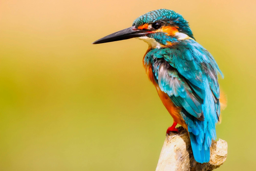

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


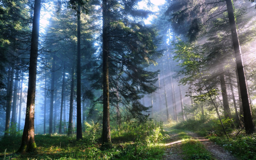

In [6]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

`fastdownload` and `download_url`:

- `fastdownload`: Think of this as your friendly neighborhood delivery service, but for files. It's help with downloading files and datasets easier.
- `download_url`: A function that fetches the file you need from a URL. In our case, it says "Hey URL, gimme that picture!" and save it as `bird.png`

`fastai.vision.all`:

- TThis module from the fastai library is like a Swiss Army knife for vision tasks, providing all the tools you need, from data loaders to model training utilities.

`to_thumb`:
- A method from the `PIL.Image` class, which is quite handy it resizes an image to a thumbnail while maintaining the aspect rato. Kind of like shrinking your favourate sweater but in a good way

These libraries and function streamline the process of getting and preparing the images for our model. For more detailed documentation, you can refer to the [fastdownload](https://fastdownload.fast.ai/), [fastai vision](https://docs.fast.ai/tutorial.vision.html), and [Pillow](https://pillow.readthedocs.io/en/stable/) documentation.

### Downloading and Preparing Images

To build our dataset, we need to download images for the categories we are interested in ('forest' and 'bird'). Here's how we did it:

In [7]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


`Path`:

- `Path`: An object-oriented way to work with filesystem paths. It makes handling files and directories as easy as pie.

`download_images`:

- `download_images`: This function fetches a bunch of images from the internet and saves them in a specified directory. Like ordering a pizza, but instead of pizza, you get pictures.

*Pausing Between Searches*:

- Pausing between searches (`sleep(10)`) is important to avoid overloading the server. Think of it as giving the server a coffee break between each request.

`resize_images`:    

- `resize_images`: A function from fastai that resizes images to a maximum specified size. This is useful for ensuring all images are of a consistent size before training the model.

For more details on these tools, you can refer to the [pathlib](https://docs.python.org/3/library/pathlib.html), [Vision utils ](https://docs.fast.ai/vision.utils.html) documentation.

### Verifying and Leaning Images

After download images, it's enssential to verify them and remove corrupt or invalid images.

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

`verify_images`:

- `verify_images`: Think of this as the bouncer for your image dataset, checking IDs to make sure no bad images get through.

`get_image_file`: 

- `get_image_file`: This function grabs all image paths in a directory. It’s like having someone fetch all your misplaced socks in the laundry room.

`Path.unlink`:

- `Path.unlink`: A method to delete files. This is how we get rid of the bad apples in the bunch.

Fortunately, in my case, all downloaded images were valid, so `len(failed)` return `0`--no bad apples in our dataset!

### The DataBlock API

Creating our data loarder is a critical step. The `DataBlock` API in fastai allows us to define how to transform and manage our data easily.

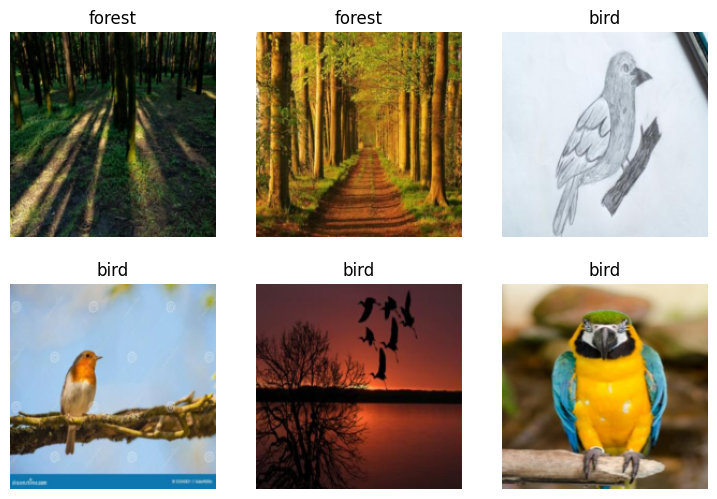

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)
    
dls.show_batch(max_n=6)

Here's the breakdown of the arguments in `DataBlock`:

`blocks`:

- Specifies the type of inputs and targets. In our case, we have images (`ImageBlock`) and categories (`CategoryBlock`). It's like saying, "I have pictures of cats and dogs"

`get_items`:

- Function to get the list of items. Here we're using `get_image_file` to retrieve all our iamge files.

`splitter`:

- Defines how to split the dataset into training and validation sets. `RandomSplitter(valid_pct=0.2, seed=42)` means 20% of the data will be used for validation. The `seed` ensures that every time we run the code we get the same split. Think of like setting your DVR to record your favourate show at the same time everyweek.

`get_y`:

- Function to get the target label from each item. We use `parent_label` to get the label from parent directory name (e.g., 'forest' or 'bird')

`item_tfms`:

- item transformation to apply. We use `Resize(129, method='squish')` to resize images to 129x129 pixels by squishing them if necessary.

`dataloaders`:

- Creates the data loaders for our dataset, with a batch size of 32. Data loaders are like conveyor belt that feed the data into your model in manageable chunks.

The `show_batch` method is handy way to visialize a batch of data items. It's like a quick preview to make sure everything looks good.

For more details, checkout the fastai [DataBlock API documentation](https://docs.fast.ai/data.block.html).

### Training the Model: Welcome to the Learner World

After preparing our dataset, it's time to train our model. We use the `vision_learner` function to setup a learner and the powerful `fine_tune` method to train the model.

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
  0%|          | 0.00/44.7M [00:00<?, ?B/s]100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.120399,1.209828,0.411765,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.185352,0.054729,0.029412,00:01
1,0.102830,0.023147,0.000000,00:01
2,0.072183,0.049310,0.029412,00:01


`vision_learner`:

- This create a learner object that combines our data loaders(`dls`) and a pre-trained model(`resnet18`). We basically saying, "Hey, take this data and use this model to learn from it."

`resnet18`:

- A specific architecture of a Convolutional Neuron Network that's been pre-trained on a large dataset. Think of it as seasoned detective who's seen it all and just need to be briefed on this specific case.

`metrics=error_rate`:

- This specifies that we want to use the error rate as a metric to evaluate our model's performance. It's like having a scoreboard to keep track of who's winning.\

`fine_tune(3)`:

- Here's where the magic happens. Unlike the traditional `fit` mothod, `fine_tune` starts by refining the pre-trained model with our specific data. It's like taking your detective and train them on a nuances of this particular mystery. The `3` indicates the number of epochs (full cycles throught the training data).

The `fine_tune` method is particularly powerful because it starts with a model that already knows a lot (thanks to pre-training) and fine-tune it to specific task. This approach often yields better results, faster and with less data, compared to tranning a model from scratch.

### Making Predictions

Finally, let's make our bird classifier predict whether or not an image contain a bird.

In [11]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9988


`PILImage.create`:

- This function create a image object from a file. It's like saying "Hey, look at this picture I just took."

`learn.predict`:

- This method uses our train model to predict what's in a image. It's like asking your well-trained detective, "What do you see in this picture?"
- The method returns three values:

    - `is_bird`: The predicted label(whether it's a bird or not).
    - `probs`: The probabilites associated with each class. 

When we print out the predicted label and the probability. If the model says it's a bird with a high probability, you can feel pretty confident your model knows its bird!

Building the "Is it a Bird?" classifier was hands-on way to introduce the principles of deep learning. By leveraging fastai and Pytorch, we could quickly create an effective model with minimal code. This approach of starting with practical, top-down learning ensures that we see immediately results and understand the real world applicability of deep learning from the get-go.

## What Is Machine Learning

Ah, the age-old question: What is the machine learning? Well, imagine if your computer was a child, and you were its teacher. Instead of giving it a a strict set of rules to follow(which, let's be honest, kids hate), you give it examples from which it can learn. In enssence, machine learning is about enabling computer to learn from data rather than being explicitly programmed. It's like teaching your computer how to ride a bike by letting it practice, fall and get up again, rather than reading it a manual

Let's take a closser look at this with a series of visualizations:

### Traditional Programming

In traditional Programming we write explicit instructions-a program-that processes input to procude results.

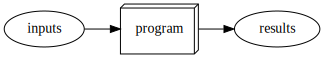

In [2]:
#| echo: false
from fastbook import *
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

Think of it as following a recipe step-by-step: preheat the oven, mix the ingredients, bake for 30 minutes, and volià, you have a cake.

### Program Using Weight And Assignment

In machine learning, we use model  with weights(parameters) that processes inputs to generates result.

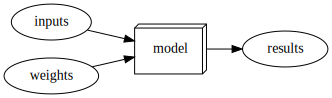

In [4]:
#| echo: false
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

Here, the model is like a reflexible recipe that can adjust itself. The ingredients(inputs) are mixed differently depending on the weights, and the ouput is a delicious result that varies based on those adjustments.

### Training a Machine Learning Model

Training a model involves feeding inputs through the model to produce results, measuring performance and updating the weights to improve accuracy.

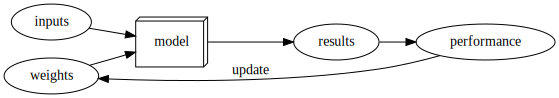

In [10]:
#| echo: false
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Think of it as trial and error. The model tries to bake a cake, and if it's to salty, it adjusts the recipe (update the weights). Over time, it learns the perfect proportions.

### Using a Trained Model

Once the model is trained, it can be used just like a tranditional program, taking inputs and producing results predictably.

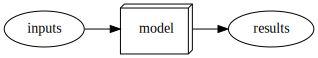

In [11]:
#| echo: false
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

Now, you have reliable recipe that consistently makes the perfect cake. The model processes new inputs(ingredients) and produces outputs(cakes) with the learned adjustments.

## What Our Image Recognizer Learned

At this stage, we have an image recognizer that works very well. But what is it actually doing? Although many people believe that deep learning results in inpenetrable "black box" models (where predictions are given, but no one understand why), this isn't entirely true. There is a vast body of reseach showing how to inspect deep learning model deeply and gain rich insights for them. However, all kind of machine learning model (including machine learning and traditional statistical models) can be challenging to fully understand, especially when dealing with new data that differs significantly from the training data.

When we fine-tuned our pre-trained model, we adapted the last layers(originally trained on general features like flowers, humans, animals) to specialize in a birds versus non-birds problem. Imagine our model initialy knew how to recognize the entire zoo, but now we've trained it to focus solely on recognizing birds. More generally, we could specialize such a pre-trained model on many different tasks.

# 

## Beyond Image Classification: Other Application of Deep Learning

Deep learning isn't just about figuring out whether there's bird in your photo. It's way more powerful than that! Let's explore a couple of areas where deep learning make significant strides:

1. **Image Segmentation**:

    Segmenation is a process of identifying and labling pixles in an image belonging to the same object. This is critically important for application like autonomous vehicles where the car needs to recognize and localize object such as pedestrians, other vehicles, and road signs. Instead of just saying, "Hey, there's a cat in a picture", segmentation says, "Here's the outline of the cat in this picture".
2. **Natural Language Processing (NLP)**:
    Deep learning has drammatically improved Natural Language Processing over the last few years. Now computers can:
    - **Generate text**: Write conherent and context-aware essays (but don't trust them with your love letters just yet).
    - **Translate languages**: Turn English into Spanish, French, or Klingon (okay, maybe not Klingon...yet)
    - **Analize comments**: Understand sentiments, detect sarcasm, and probably tell when you're being a bit snarky.
    - **Label words in sentences**: Identify parts of speech (nouns, verbs, adjectives, etc.), entities (like names and places), and more.

Here's some cool code to classify the sentiment of a movie review better than anything availible just a few years ago: 

In [1]:
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.462561,0.395122,0.822320,03:08


epoch,train_loss,valid_loss,accuracy,time
0,0.301779,0.248262,0.899480,06:38
1,0.244484,0.202708,0.921480,06:38
2,0.189148,0.194167,0.926160,06:37
3,0.148741,0.191470,0.929720,06:38


In [2]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([7.8042e-04, 9.9922e-01]))

And boom! You have a state-of-art sentiment analyzer.

## The Important of Validation and Test Sets

We've trained our model and it's looking pretty smart, but know how do we know it's actually learned something useful? This is where validation and test sets come in.

### Why Do We Need a Validation set?

The goal of a model is to make predictions about unseen data. If we trained a model with all our data and evaluated it using the same data, we wouldn't realy know how well it performs on new, unseen data. It could just memorize the training data(cheating basically). The model could get great results on your training data but bomb when given the data to analyze. To avoid this, we:
- **We split dataset**: We divide our data into traning and validation sets. The trainning set is used to teach the model, and the validation set is used to see how well it's learning

### Preventing Overfitting with a Test set

Overfitting is a common issue where the model preform exceptionally well on the traning set but poorly on the validation set, meaning it has memorized the training data rather than learing the generalizable pattern.

Even when your model hasn't fully memorized all your data, it might memorized certain parts of it during earlier traning stages. The longer you train, the better the accuracy on the traning set, but eventually, the validation accuracy will start to decline. This is because your model is begins memorizing the traning data instead of learning the parttern that generalize well. When this happens, we say the model is overfitting.

Here's an example to visualize overfitting:


<style>
    figure {
        display: block;
        mergin-left: auto;
        mergin-right: auto;
        text-align: center;
    }
</style>

<figure>
    <img src="./att_00000.png" alt="Example of overfitting" style="width:90%;">
    <figcaption>Example of overfitting</figcaption>
</figure>

The Image shows what happends when you overfit, using a simplified example where we have just one parameter and some randomly generated data. Although the overfitted model's prediction are accurate for the data near the observed data points, they are way off when outside of that range.

Overfitting is the single most important and challenging issue when training machine learning models. It's easy to create a model that does the great job at making predictions on the data it's been trained on, but making accurate predictions on new data is much harder.

For instance, if you writting a handwriteen digit classifier (as we will very soon) and use it to recognize numbers on checks, you won't see the same numbers the model was trained on--checks will have different variations of handwriting to deal with.


## Wrapping Up

Deep learning is an exciting field that extends far beyond simple image classification. From understand speech to translate langugaes and detecting malware, it's applications are vast. Through this blog post, we've seen how to build a bird classifier using the fastai library-an accessible, powrful tool that simplifies the complexities of machine learning.

By spllitting our data into traning and validation sets, we ensure our model doesn't cheat and genuinely learns the task at hand. With powerful tools like fastai and the aibility to handle the deverse tasks, deep learning truly has potential to transform numerous industries.

I hope you enjoyed this journey as much as I did. Remember, the key to mastering deep learing is to keep experimenting and learning. So go ahead, build that next big thing, and maybe teach your computer to recognize your pet fish or translate cat's meows!

## Final Thoughts

Thank you for joining me on this deep learning adventure! if you find this blog helpful or inspiring, please share it with others who might also be interested. Deep learning is a continuously envolving field with endless possibilities. Stay curious, keep learning, and don't hasitate to dive deeper into the world of AI.

Feel free to leave your comments, questions, or insights below. I'd love to hear your experiences, projects, and what you're learning. Together, we can continue to explore and push the boundaries of what's possible with deep learning.

Happy coding, and may your models always be accurate!